In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [23]:
df = pd.read_csv('Selected_features.csv')

df

,Run,Best Correlation Score,Best Accuracy Score,Selected Features
0,Run 1,0.1955,0.9102,"['CardiovascularDisease', 'BehavioralProblems'..."
1,Run 2,0.2241,0.9136,"['Diabetes', 'BehavioralProblems', 'Confusion'..."
2,Run 3,0.2480,0.9182,"['BehavioralProblems', 'Gender', 'MemoryCompla..."
3,Run 4,0.2474,0.9129,"['Diabetes', 'BehavioralProblems', 'DietQualit..."
4,Run 5,0.2140,0.9122,"['BehavioralProblems', 'FunctionalAssessment',..."
5,Run 6,0.2195,0.9142,"['Diabetes', 'BehavioralProblems', 'SleepQuali..."
6,Run 7,0.2142,0.9209,"['CardiovascularDisease', 'BehavioralProblems'..."
7,Run 8,0.2152,0.9156,"['BehavioralProblems', 'Disorientation', 'Memo..."
8,Run 9,0.1906,0.9182,"['Diabetes', 'BehavioralProblems', 'SleepQuali..."
9,Run 10,0.2151,0.9169,"['BehavioralProblems', 'DifficultyCompletingTa..."


In [24]:
sf = df.loc[df["Run"] == "Run 3", "Selected Features"].values[0]
sf
sf_list = ast.literal_eval(sf)
sf_list

['BehavioralProblems',
 'Gender',
 'MemoryComplaints',
 'FunctionalAssessment',
 'ADL',
 'MMSE']

In [25]:
main_df = pd.read_csv('alzheimers_disease_data.csv')
main_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [26]:
df_filtered = main_df[sf_list + ['Diagnosis']]
df_filtered.to_csv("filtered_selected_features.csv", index=False)
df_filtered


,BehavioralProblems,Gender,MemoryComplaints,FunctionalAssessment,ADL,MMSE,Diagnosis
0,0,0,0,6.518877,1.725883,21.463532,0
1,0,0,0,7.118696,2.592424,20.613267,0
2,0,0,0,5.895077,7.119548,7.356249,0
3,1,1,0,8.965106,6.481226,13.991127,0
4,0,0,0,6.045039,0.014691,13.517609,0
...,...,...,...,...,...,...,...
2144,0,0,0,0.238667,4.492838,1.201190,1
2145,1,0,0,8.687480,9.204952,6.458060,1
2146,0,0,0,1.972137,5.036334,17.011003,1
2147,0,1,0,5.173891,3.785399,4.030491,1


                      BehavioralProblems    Gender  MemoryComplaints  \
BehavioralProblems              1.000000  0.006099         -0.009765   
Gender                          0.006099  1.000000          0.003880   
MemoryComplaints               -0.009765  0.003880          1.000000   
FunctionalAssessment           -0.021941  0.033324          0.002320   
ADL                             0.043376  0.003865         -0.037511   
MMSE                            0.025408  0.025330          0.007652   
Diagnosis                       0.224350 -0.020975          0.306742   

                      FunctionalAssessment       ADL      MMSE  Diagnosis  
BehavioralProblems               -0.021941  0.043376  0.025408   0.224350  
Gender                            0.033324  0.003865  0.025330  -0.020975  
MemoryComplaints                  0.002320 -0.037511  0.007652   0.306742  
FunctionalAssessment              1.000000  0.053904  0.024932  -0.364898  
ADL                               0.053904 

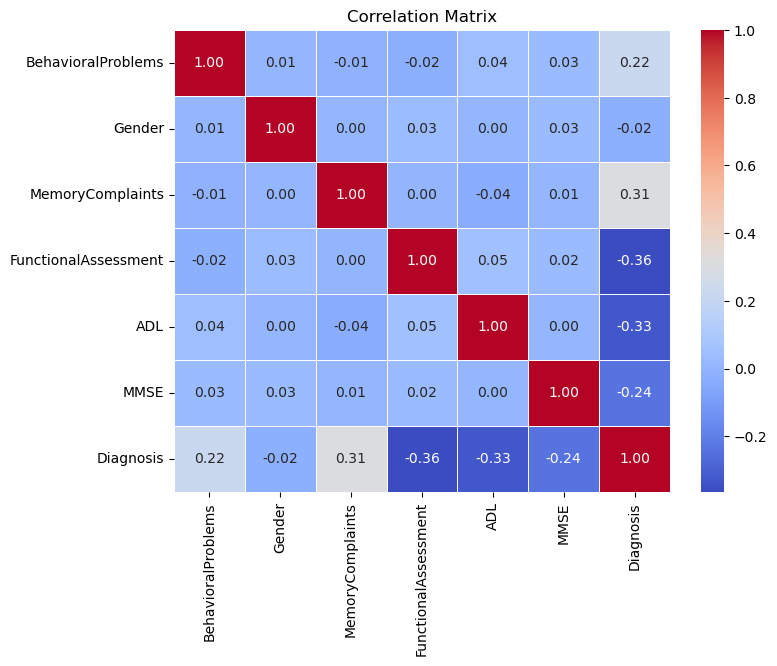

In [27]:
correlation_matrix = df_filtered.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


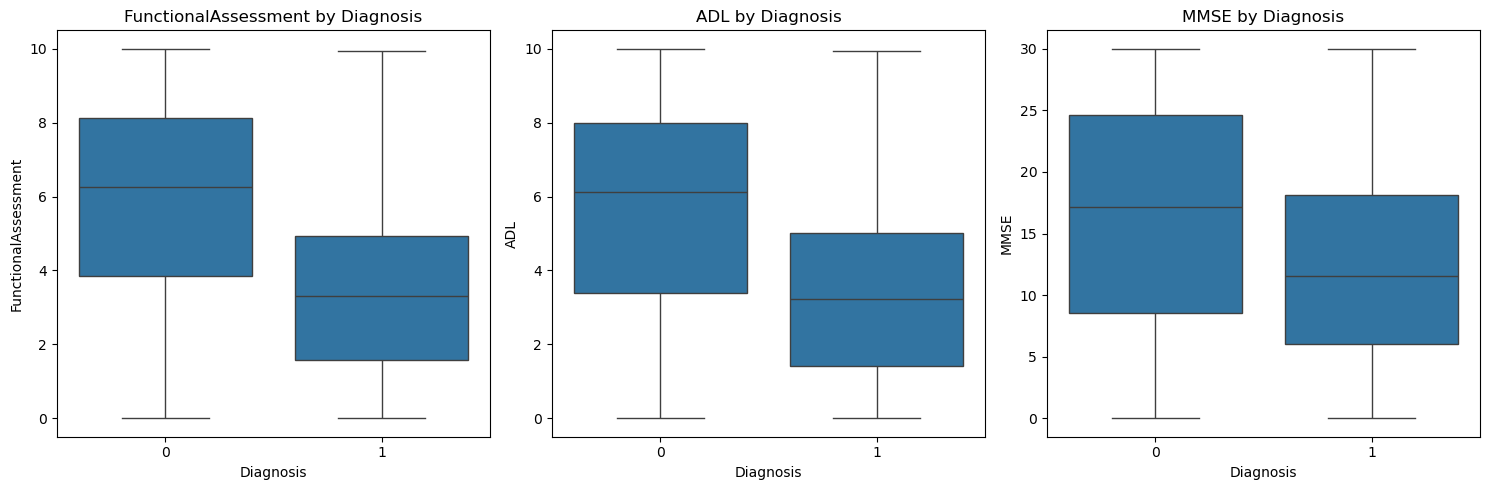

In [28]:
numerical_cols = ['FunctionalAssessment', 'ADL', 'MMSE']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x= 'Diagnosis', y= col, data = df_filtered)
    plt.title(f'{col} by Diagnosis')

plt.tight_layout()
#plt.savefig("numerical_f.png", dpi=300)
plt.show()

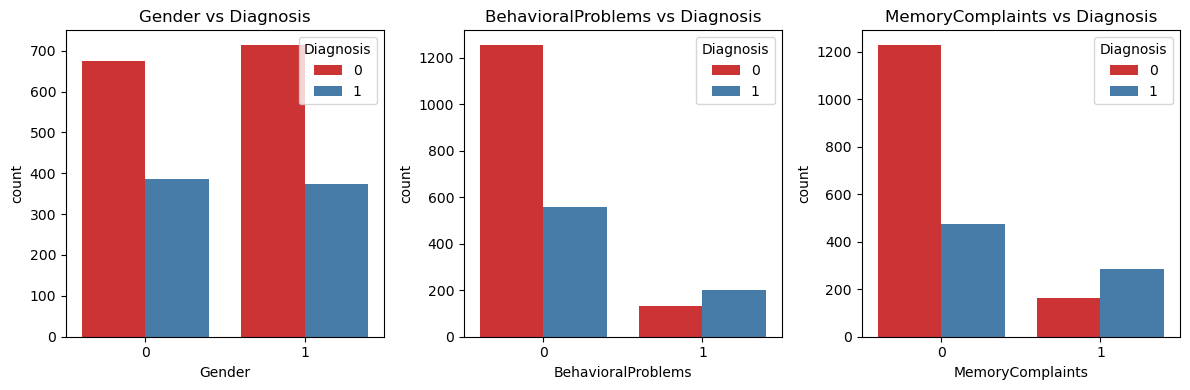

In [29]:
categorical_cols = ['Gender', 'BehavioralProblems', 'MemoryComplaints']

plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, hue='Diagnosis', data=df_filtered, palette='Set1')
    plt.title(f'{col} vs Diagnosis')

plt.tight_layout()
#plt.savefig("categorical_f.png", dpi=300)
plt.show()

### Data Pre-processing

In [30]:
X = df_filtered.drop('Diagnosis', axis= 1)
y = df_filtered['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Building the models

In [31]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 42)

models = {
    'DecisionTree': DecisionTreeClassifier(), 'RandomForest': RandomForestClassifier(), 'svc': SVC()
}

# Define parameters to test using the randomized grid search
param_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    
    'RandomForest': {
        'n_estimators': randint(50, 200),
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    
    'svc': {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
    }
}

### Grid Serach

In [32]:
# for name, model in models.items():
#     #print(name)
#     print(f"Running RandomizedSearchCV for {name}...")
#     random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], cv =kf, n_iter =100, random_state=42, n_jobs=-1)
#     random_search.fit(X_train_scaled, y_train)
#     print(f"Best parameters for {name}: {random_search.best_params_}\n")


search results: 
search results: Running RandomizedSearchCV for DecisionTree...
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Running RandomizedSearchCV for RandomForest...
Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 102}

Running RandomizedSearchCV for svc...
Best parameters for svc: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.97      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.96      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



Confusion Matrix:
 [[272   5]
 [ 15 138]]


Accuracy Score:
 0.9534883720930233
[0.9534883720930233]


[0.9531150398295376]
[0.9538906924045891]


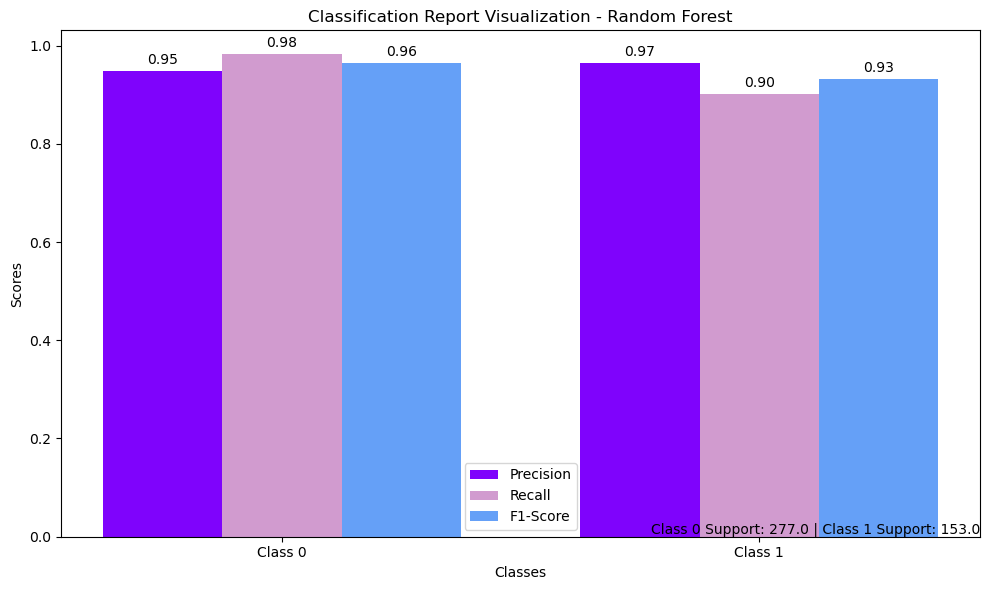

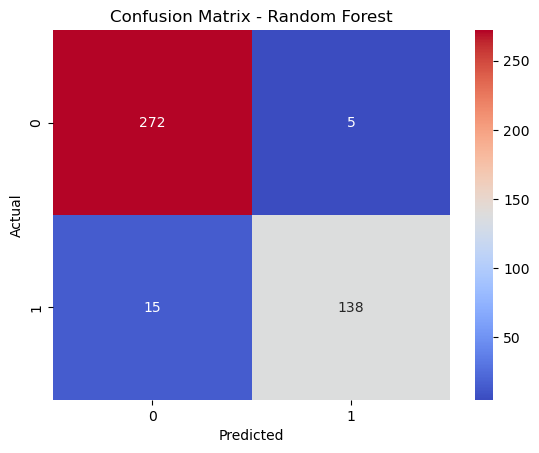

In [33]:

accuracy_scores = [] 
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
modelr = RandomForestClassifier(criterion='gini', max_depth=50, min_samples_leaf=2, min_samples_split=8, n_estimators=102, random_state=42)
modelr.fit(X_train_scaled, y_train)
y_predr = modelr.predict(X_test_scaled)
accuracyr = accuracy_score(y_test, y_predr)
report_r = classification_report(y_test, y_predr, output_dict=True)

precision_r = report_r['weighted avg']['precision']
recall_r = report_r['weighted avg']['recall']
f1_r = report_r['weighted avg']['f1-score']

metrics['Model'].append('Random Forest')
metrics['Accuracy'].append(accuracyr)
metrics['Precision'].append(precision_r)
metrics['Recall'].append(recall_r)
metrics['F1-Score'].append(f1_r)

print('Classification Report:\n', classification_report(y_test, y_predr))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predr))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracyr)

accuracy_scores.append(accuracyr)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_r['0']['precision'], report_r['1']['precision']]
recall = [report_r['0']['recall'], report_r['1']['recall']]
f1_score = [report_r['0']['f1-score'], report_r['1']['f1-score']]
support = [report_r['0']['support'], report_r['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
#plt.savefig("classification_rf.png", dpi=300)
plt.show()

conf_matrix = confusion_matrix(y_test, y_predr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
#plt.savefig("confusion_rf.png", dpi=300)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.92      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



Confusion Matrix:
 [[266  11]
 [ 20 133]]


Accuracy Score:
 0.9279069767441861
[0.9534883720930233, 0.9279069767441861]


[0.9531150398295376, 0.9273908901898491]
[0.9538906924045891, 0.927771792161327]


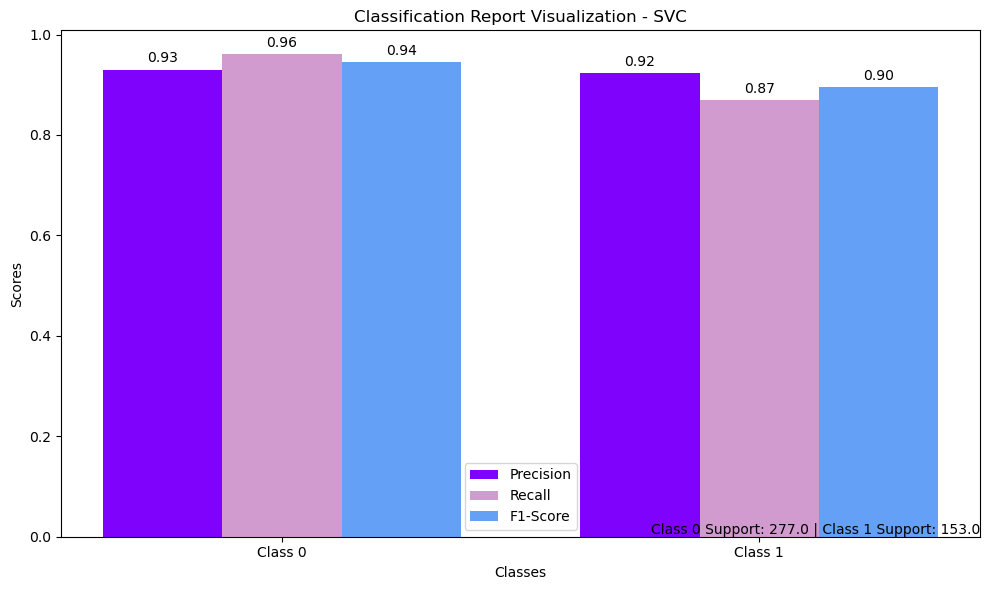

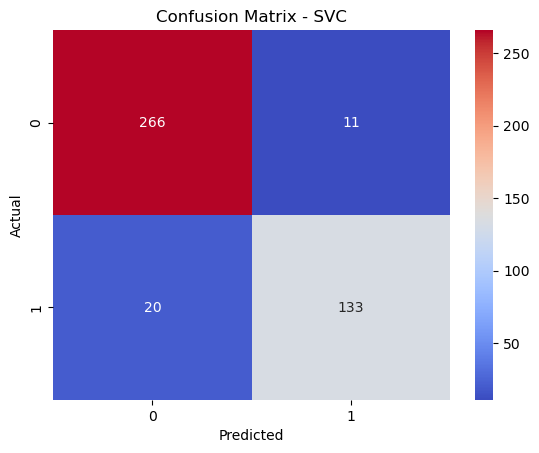

In [34]:

modelsvc = SVC(kernel='rbf', gamma='auto', C=10, probability=True)
modelsvc.fit(X_train_scaled, y_train)
y_predsvc = modelsvc.predict(X_test_scaled)
accuracysvc = accuracy_score(y_test, y_predsvc)
report_svc = classification_report(y_test, y_predsvc, output_dict=True)

# Extract metrics
precision_svc = report_svc['weighted avg']['precision']
recall_svc = report_svc['weighted avg']['recall']
f1_svc = report_svc['weighted avg']['f1-score']

metrics['Model'].append('SVC')
metrics['Accuracy'].append(accuracysvc)
metrics['Precision'].append(precision_svc)
metrics['Recall'].append(recall_svc)
metrics['F1-Score'].append(f1_svc)

print('Classification Report:\n', classification_report(y_test, y_predsvc))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predsvc))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracysvc)

accuracy_scores.append(accuracysvc)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_svc['0']['precision'], report_svc['1']['precision']]
recall = [report_svc['0']['recall'], report_svc['1']['recall']]
f1_score = [report_svc['0']['f1-score'], report_svc['1']['f1-score']]
support = [report_svc['0']['support'], report_svc['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - SVC')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
#plt.savefig("classification_svc.png", dpi=300)
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predsvc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
#plt.savefig("confusion_svc.png", dpi=300)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       277
           1       0.95      0.90      0.92       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



Confusion Matrix:
 [[270   7]
 [ 16 137]]


Accuracy Score:
 0.9465116279069767
[0.9534883720930233, 0.9279069767441861, 0.9465116279069767]


[0.9531150398295376, 0.9273908901898491, 0.9461287249795657]
[0.9538906924045891, 0.927771792161327, 0.9466651081476662]


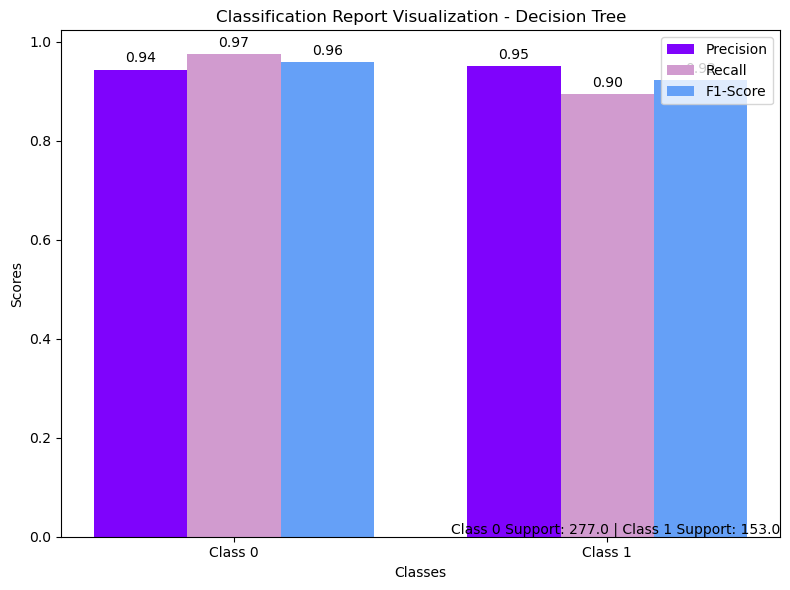

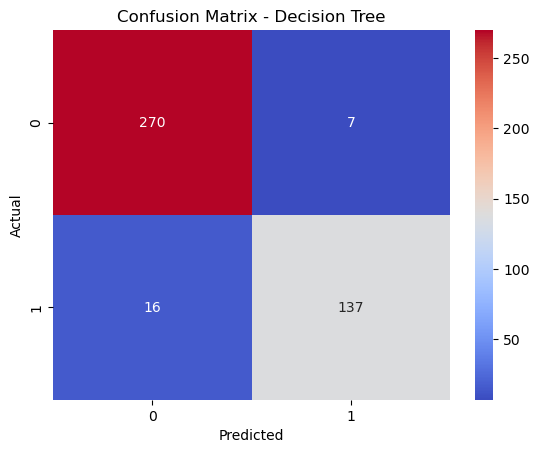

In [35]:

modeld = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2)
modeld.fit(X_train_scaled, y_train)
y_predd = modeld.predict(X_test_scaled)
accuracyd = accuracy_score(y_test, y_predd)
report_d = classification_report(y_test, y_predd, output_dict=True)

# Extract metrics
precision_d = report_d['weighted avg']['precision']
recall_d = report_d['weighted avg']['recall']
f1_d = report_d['weighted avg']['f1-score']

metrics['Model'].append('Decision Tree')
metrics['Accuracy'].append(accuracyd)
metrics['Precision'].append(precision_d)
metrics['Recall'].append(recall_d)
metrics['F1-Score'].append(f1_d)

print('Classification Report:\n', classification_report(y_test, y_predd))
print('\n=================================================\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predd))
print('\n=================================================\n')
print('Accuracy Score:\n', accuracyd)

accuracy_scores.append(accuracyd)
print(accuracy_scores)
print('\n=================================================\n')
print(metrics['F1-Score'])
print(metrics['Precision'])

# Plot Classification Report
classes = ['Class 0', 'Class 1']
precision = [report_d['0']['precision'], report_d['1']['precision']]
recall = [report_d['0']['recall'], report_d['1']['recall']]
f1_score = [report_d['0']['f1-score'], report_d['1']['f1-score']]
support = [report_d['0']['support'], report_d['1']['support']]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#7f03fc')
bar2 = ax.bar(x, recall, width, label='Recall', color='#d19bcf')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#65a0f7')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization - Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom')

support_text = f'Class 0 Support: {support[0]} | Class 1 Support: {support[1]}'
ax.annotate(support_text, xy=(1, 0), xycoords='axes fraction', fontsize=10, color='black', ha='right', va='bottom')

plt.tight_layout()
#plt.savefig("classification_dt.png", dpi=300)
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predd)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
#plt.savefig("confusion_dt.png", dpi=300)
plt.show()


In [36]:
metrics

{'Model': ['Random Forest', 'SVC', 'Decision Tree'],
 'Accuracy': [0.9534883720930233, 0.9279069767441861, 0.9465116279069767],
 'Precision': [0.9538906924045891, 0.927771792161327, 0.9466651081476662],
 'Recall': [0.9534883720930233, 0.9279069767441861, 0.9465116279069767],
 'F1-Score': [0.9531150398295376, 0.9273908901898491, 0.9461287249795657]}

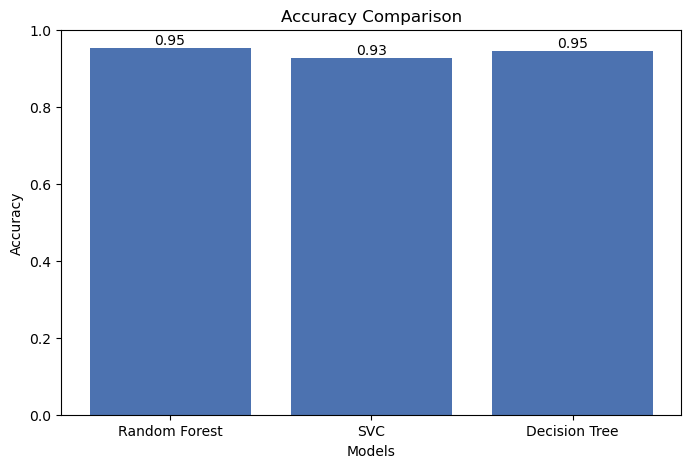

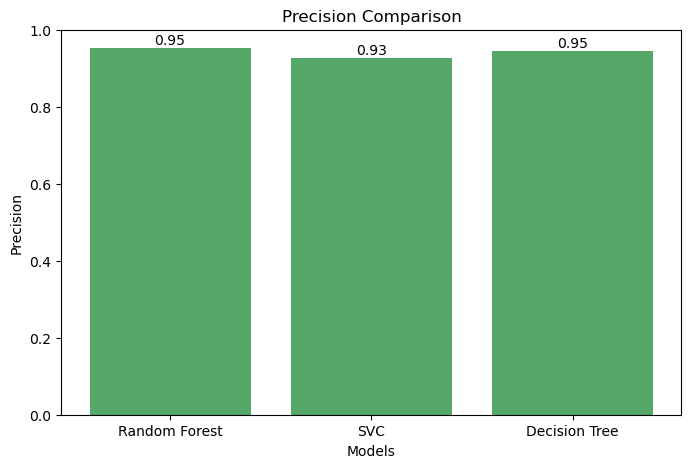

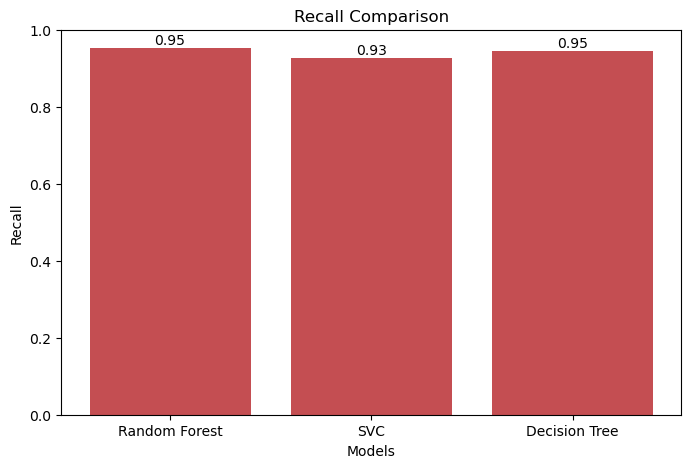

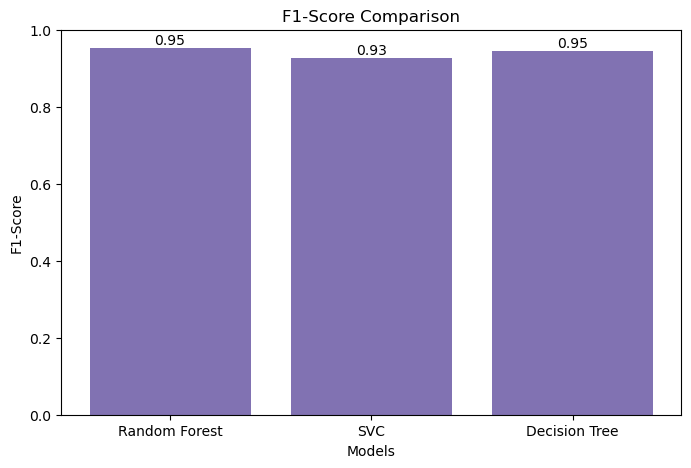

In [37]:
# Extract data from the metrics dictionary
models = metrics['Model']
accuracy = metrics['Accuracy']
precision = metrics['Precision']
recall = metrics['Recall']
f1_score = metrics['F1-Score']

# Plotting function
def plot_metric(data, title, color):
    plt.figure(figsize=(8, 5))
    plt.bar(models, data, color=color)
    plt.xlabel('Models')
    plt.ylabel(title)
    plt.title(f'{title} Comparison')
    # Adding values on top of bars
    for i, value in enumerate(data):
        plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)
    #plt.savefig(f"{title}.png", dpi=300)
    plt.show()

# Plot each metric separately
plot_metric(accuracy, 'Accuracy', '#4C72B0')
plot_metric(precision, 'Precision', '#55A868')
plot_metric(recall, 'Recall', '#C44E52')
plot_metric(f1_score, 'F1-Score', '#8172B2')

In [38]:
pd.DataFrame(metrics).to_csv("metrics.csv", index=False)

Saving trained models into pkl file to use in dashboard

In [ ]:

# # Save models
# with open("rf_model.pkl", "wb") as f:
#     pickle.dump(modelr, f)

#with open("svc_model.pkl", "wb") as f:
    #pickle.dump(modelsvc, f)

# with open("dt_model.pkl", "wb") as f:
#     pickle.dump(modeld, f)


In [40]:

# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

In [41]:
metrics

{'Model': ['Random Forest', 'SVC', 'Decision Tree'],
 'Accuracy': [0.9534883720930233, 0.9279069767441861, 0.9465116279069767],
 'Precision': [0.9538906924045891, 0.927771792161327, 0.9466651081476662],
 'Recall': [0.9534883720930233, 0.9279069767441861, 0.9465116279069767],
 'F1-Score': [0.9531150398295376, 0.9273908901898491, 0.9461287249795657]}